In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']


In [17]:
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker="x")
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker="o")
    
    plt.plot([80,80], [50, 110], "r--", lw=2)
    plt.xlabel("Project Grade")
    plt.ylabel("Test Grade")
    


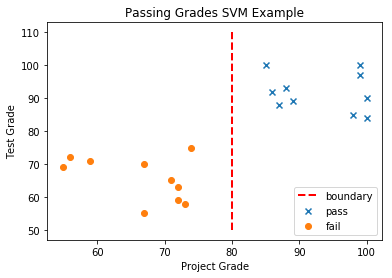

In [18]:
setup_plot()
plt.legend(["boundary", "pass", "fail"], loc=4)
plt.title("Passing Grades SVM Example")
plt.show()

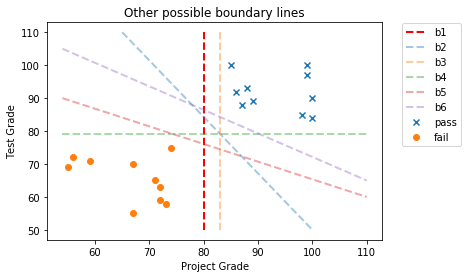

In [19]:
setup_plot()

plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4)

plt.legend(["b1", "b2", "b3", "b4", "b5", "b6", "pass", "fail"],
          bbox_to_anchor=(.25, .02, 1, 1))
plt.title("Other possible boundary lines")
plt.show()

In [20]:
from sklearn.svm import SVC

X = test_data[["test", "project"]]
Y = test_data["pass"]
svm = SVC(kernel = "linear")
svm.fit(X,Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

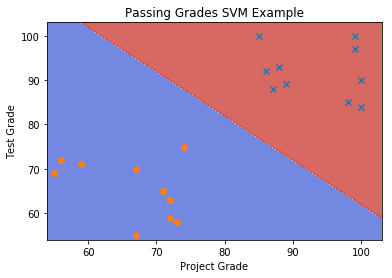

In [21]:
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                    np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=="pass")

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker="x")
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker="o")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()


In [22]:
import scipy

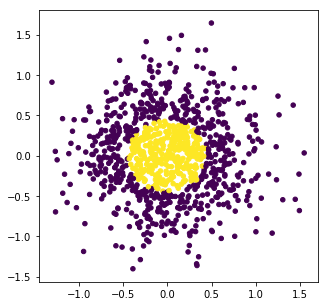

In [23]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)

In [24]:
from mpl_toolkits.mplot3d import Axes3D

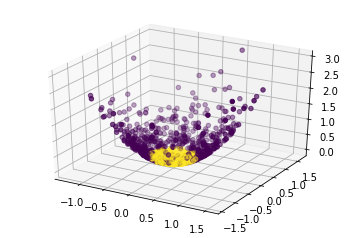

In [25]:
data["x2_y2"] = data.x**2 + data.y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir="z", c=data.d)

AttributeError: 'float' object has no attribute 'ndim'

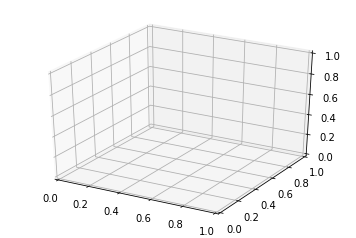

In [26]:

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)
